In [1]:
using IFSintegrals, Plots;

┌ Info: Precompiling IFSintegrals [2e7d41c8-7523-11ec-3fc2-377bcf57d765]
└ @ Base loading.jl:1423


Create IFS, as an array of similarities:

In [2]:
ρ = 0.41
    IFS = [
        Similarity(ρ,[0,0])
        Similarity(ρ,[1-ρ,0])
        Similarity(ρ,[(1-ρ)/2,sqrt(3)*(1-ρ)/2])
        Similarity(ρ,[(1-ρ)/2,(1-ρ)/(2*sqrt(3))])
    ]
Γ = Attractor(IFS);

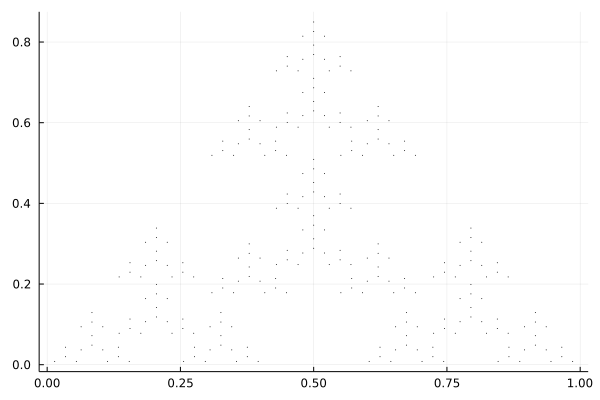

In [3]:
draw(Γ)

The exterior Helmholtz PDE is
$$(\Delta+k^2) u = 0 \quad\text{ in } \quad\mathbb{R}^2\setminus\Gamma,\qquad u=0\text{ on } \Gamma$$.

This can be reformulated as a boundary integral equation: 
$$S\phi = f \quad\text{on } \Gamma,$$ with wavenumber $k$, incident direction $d$, where $S$ is an integral operator.

In [4]:
k = 52.0
d = [0, 0, -1]
S = SingleLayer(Γ, k)
f(x) = exp(im*k*(d[1:2]'*x))

f (generic function with 1 method)

Now approximately solve the boundary integral equation, via Galekrin method: Find $\phi_h\in V_h(\Gamma)$ which satisfies
$$\left<S\phi_h,\varphi\right>_\Gamma = \left<f,\varphi\right>_\Gamma,\quad\varphi\in V_h(\Gamma)$$

In [5]:
Sh = DiscreteSIO(S,h_mesh = 0.05, h_quad = 0.01)
ϕ = Sh\f;

Constructing discrete system 100%|██████████████████████| Time: 0:00:01


Now plot the solution in some slice of the domain, using the representation formula
$$
u(x) = u^i(x) - \int_\Gamma \Phi(x,y)\phi(y)\mathcal{H}^d(y) \approx u^i(x) - \int_\Gamma \Phi(x,y)\phi_h(y)\mathcal{H}^d(y),\quad x \in\mathbb{R}^2\setminus\Gamma
$$

In [8]:
XY0,x,y = slice([-0.5,-0.5],[1.5,1.5],-0.2,100,100)
Sₖϕ = single_layer_potential(ϕ,k)# returns function
uⁱ(x) = exp(im*k*(d'*x)) # define inc field in domain
uᵗ(x) = uⁱ(x) - Sₖϕ(x)

uᵗ (generic function with 1 method)

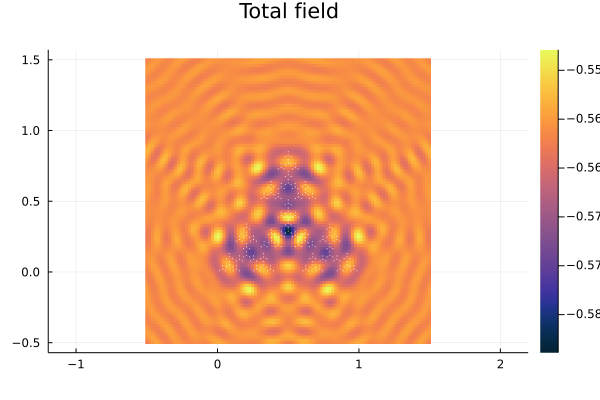

In [9]:
heatmap(x,y,real(uᵗ.(XY0)), aspect_ratio = 1, 
    title="Total field", legend=true, c = :thermal)
IFSintegrals.draw!(Γ,color = "white")